Generate smiles string with minGPT
* import
* read dataset with smiles strings
    * need to create a meta file somehow ?
        * smiles itself
        * raw formula
        * properties
        * train/test split, if not already available
    * filter molecules based on stuff once we have the meta information
* EDA:
    * once the meta is here
* data loader
    * tokeniser ?
    * stoi/itos
    * phase ?
* model
    * straightforward for the moment
    * later: with properties, will need to cat them with embeddings somehow
* training loop:
    * straighforward from minGPT
    * 
* exploitation
    * need helpers functions
    * look for ratio of valid smiles string generated

## Import

In [2]:
from rdkit import Chem
import pandas as pd
import os

from rdkit.Chem.rdMolDescriptors import CalcMolFormula
import string

In [3]:
def CHNO_only(mol):
    for atom in mol.GetAtoms():
        symb = atom.GetSymbol()
        if symb not in ['C','H','N','O']:
            return False
    return True

def orga_mol(mol):
    for atom in mol.GetAtoms():
        symb = atom.GetSymbol()
        if symb not in ['C','H','N','O','Br','I','F','S','Cl','P']:
            return False
    return True

def info_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    n_atoms = mol.GetNumAtoms()
    MolFormula = CalcMolFormula(mol)
    l = len(smiles)
    CHNO = CHNO_only(mol)
    orga = orga_mol(mol)
    return pd.Series([n_atoms,MolFormula,l,CHNO, orga])#pd.DataFrame({'n_atoms':n_atoms,'MolFormula':MolFormula,'l':l}, index=[0])


In [4]:
raw_path = '/home/teleport/perso/merged_1m//'
process_path = '/home/teleport/perso/process_full/'
data_path = '/home/teleport/perso/'

if not os.path.exists(process_path):
    os.mkdir(process_path)
    
EXPERIMENT = '20201210_DF_data_prep_full'
# from trains import Task
# import trains
# task = Task.init(project_name='gpt_smiles', task_name=EXPERIMENT)

## Apply the function to all files

In [ ]:
# for i in os.listdir(raw_path):
#     if not os.path.exists(process_path + i):
#         print(i)

#         data = pd.read_csv(raw_path + i)
#         print(len(data))
#         data = data.sample(frac=0.1, replace=False, random_state=1)
# #         print(len(data))
#         if len(data) > 0:
#             data = data[['smiles', 'mwt', 'logp']]
#             data = data[['smiles', 'mwt', 'logp']]
            
#             meta = data['smiles'].apply(info_from_smiles)
#             meta.columns = ['n_atoms','MolFormula','l','CHNO','orga']

#             data = pd.concat([data, meta], axis=1)

#             data.to_csv(process_path + i)

726.txt
1000000
83.txt
1000000
123.txt
1000000
662.txt
1000000
TRAINS Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start
810.txt
1000000
402.txt
1000000
576.txt
1000000
342.txt
1000000
483.txt
1000000
545.txt
1000000
638.txt
1000000
517.txt
1000000
807.txt
1000000
192.txt
1000000
421.txt
1000000
909.txt
1000000
893.txt
1000000
860.txt
1000000
823.txt
1000000
145.txt
1000000
862.txt
1000000
225.txt
1000000
572.txt
1000000
630.txt
1000000
112.txt
1000000
416.txt
1000000
305.txt
1000000
53.txt
1000000
497.txt
1000000
313.txt
1000000
606.txt
1000000
67.txt
1000000
684.txt
1000000
162.txt
1000000
401.txt
1000000
248.txt
1000000
136.txt
1000000
490.txt
1000000
358.txt
1000000
693.txt
1000000
346.txt
1000000
308.txt
1000000
547.txt
1000000
553.txt
1000000
10.txt
1000000
457.txt
1000000
318.txt
1000000
886.txt
1000000
310.txt
1000000
389.txt
1000000
865.txt
1000000
186.txt
1000000
647.txt
1000000
757.txt
1000000
478.txt
1000000
591.txt
1000000
607.t

## combine the files

In [5]:
data = [pd.read_csv(process_path + i) for i in os.listdir(process_path)]
data = pd.concat(data)
data = data[['smiles', 'mwt', 'logp','n_atoms','MolFormula','l','CHNO','orga']]

In [6]:
data

,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,orga
0,Cc1cc(F)c(S(=O)(=O)NCc2csc(-c3ccc(C(F)(F)F)cc3...,448.438,4.894,29,C18H13F5N2O2S2,54,False,True
1,CC[C@H](NC(=O)[C@H](O)c1cccc(Br)c1)c1cc(F)cc(B...,445.126,4.652,23,C17H16Br2FNO2,50,False,True
2,Cc1cccc(O[C@@H](C)c2nnc(N3CCC(NC(C)C)CC3)n2Cc2...,437.588,4.643,32,C25H35N5O2,55,True,True
3,CCOc1ccc(CN(C)C(=O)c2cccc3c2CN(C(=O)OC(C)(C)C)...,440.540,4.617,32,C25H32N2O5,54,True,True
4,CC[C@H](CCc1ccccc1)NC(=O)N1CCC(CNC(=O)OCc2cccc...,437.584,4.746,32,C26H35N3O3,52,True,True
...,...,...,...,...,...,...,...,...
99995,Cc1noc(C)c1S(=O)(=O)N[C@@H](C)C(=O)N1CC[S@](=O...,377.488,0.185,24,C14H23N3O5S2,59,False,True
99996,CCc1nc(NS(=O)(=O)CCCS(=O)(=O)N[C@@H]2C=CCCC2)n...,377.492,0.527,24,C13H23N5O4S2,51,False,True
99997,CCCN1C(=O)c2ccccc2N2C(=O)CC[C@@]21C(=O)N[C@@H]...,389.452,0.889,28,C20H27N3O5,54,True,True
99998,CC1(C)CN(C(=O)C(=O)N2CCC(O)(Cc3ccc(F)cc3)CC2)CCN1,377.460,0.932,27,C20H28FN3O3,49,False,True


In [7]:
data = data[data['orga']].reset_index()

In [8]:

data = data[(data['mwt'] <= 500)]#.reset_index()
# data = data[(data['mwt'] > 100)]

In [9]:
data.to_csv(data_path + '/10pc_cleaned.csv',index = False)

## EDA with what we have now

In [7]:
# data = pd.read_csv(data_path + '/10pc_cleaned.csv')

In [10]:
data['l_MolFormula'] = data['MolFormula'].apply(len)

In [11]:
data['l_chunk'] = data['l'] + data['l_MolFormula'] + 2 + 4

In [12]:
max(data['l_chunk'])

169

In [13]:
data

,index,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,orga,l_MolFormula,l_chunk
0,0,Cc1cc(F)c(S(=O)(=O)NCc2csc(-c3ccc(C(F)(F)F)cc3...,448.438,4.894,29,C18H13F5N2O2S2,54,False,True,14,74
1,1,CC[C@H](NC(=O)[C@H](O)c1cccc(Br)c1)c1cc(F)cc(B...,445.126,4.652,23,C17H16Br2FNO2,50,False,True,13,69
2,2,Cc1cccc(O[C@@H](C)c2nnc(N3CCC(NC(C)C)CC3)n2Cc2...,437.588,4.643,32,C25H35N5O2,55,True,True,10,71
3,3,CCOc1ccc(CN(C)C(=O)c2cccc3c2CN(C(=O)OC(C)(C)C)...,440.540,4.617,32,C25H32N2O5,54,True,True,10,70
4,4,CC[C@H](CCc1ccccc1)NC(=O)N1CCC(CNC(=O)OCc2cccc...,437.584,4.746,32,C26H35N3O3,52,True,True,10,68
...,...,...,...,...,...,...,...,...,...,...,...
91323803,99995,Cc1noc(C)c1S(=O)(=O)N[C@@H](C)C(=O)N1CC[S@](=O...,377.488,0.185,24,C14H23N3O5S2,59,False,True,12,77
91323804,99996,CCc1nc(NS(=O)(=O)CCCS(=O)(=O)N[C@@H]2C=CCCC2)n...,377.492,0.527,24,C13H23N5O4S2,51,False,True,12,69
91323805,99997,CCCN1C(=O)c2ccccc2N2C(=O)CC[C@@]21C(=O)N[C@@H]...,389.452,0.889,28,C20H27N3O5,54,True,True,10,70
91323806,99998,CC1(C)CN(C(=O)C(=O)N2CCC(O)(Cc3ccc(F)cc3)CC2)CCN1,377.460,0.932,27,C20H28FN3O3,49,False,True,11,66


<AxesSubplot:xlabel='l', ylabel='mwt'>

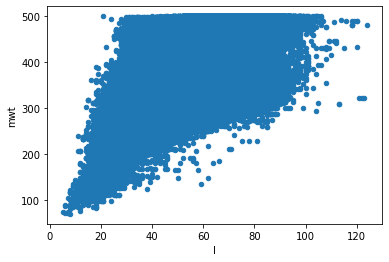

In [28]:
data.plot.scatter('l','mwt')

<AxesSubplot:ylabel='Density'>

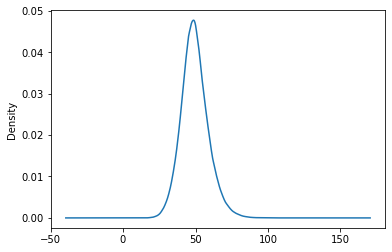

In [14]:
data.sample(frac=0.05, replace=False, random_state=1)['l'].plot.density()

<AxesSubplot:ylabel='Density'>

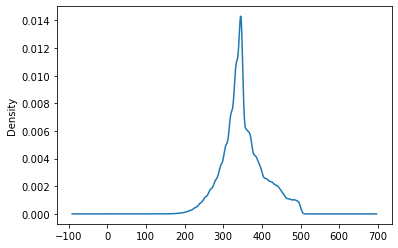

In [10]:
data.sample(frac=0.05, replace=False, random_state=1)['mwt'].plot.density()

<AxesSubplot:ylabel='Density'>

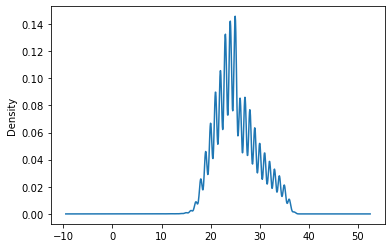

In [30]:
data.sample(frac=0.05, replace=False, random_state=1)['n_atoms'].plot.density()

<AxesSubplot:ylabel='Density'>

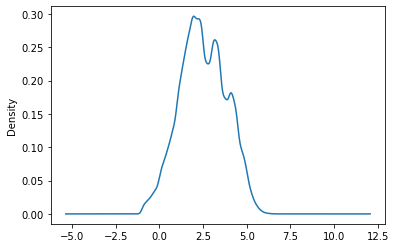

In [29]:
data.sample(frac=0.05, replace=False, random_state=1)['logp'].plot.density()

In [14]:
## number of unique MolFormula
len(data['MolFormula'].unique())

414908

## Work on word list and test it

In [47]:
sum(data['smiles'].str.contains('8',regex=False))

13

In [15]:
word_list = ['C','c','N','n','O','o','H','B','r','l','I','F','S','s','P','.','[',']','(',')','-','+','=','@','/','\\','#','$','&']
word_list += list(string.digits)
stoi = { ch:i for i,ch in enumerate(word_list) }
itos = { i:ch for i,ch in enumerate(word_list) }

In [16]:
def tokenize_smiles(smiles, molecular_formula, stoi, block_size = None, stop_token = '$', split_token = '&'):
    chunk = molecular_formula + split_token + smiles + stop_token
    if block_size is not None:
        chunk = chunk + stop_token*(block_size - len(chunk))
    data = [stoi[s] for s in chunk]
    return data

In [39]:
# for idx in range(len(data)):
# #     try:
#     truc = tokenize_smiles(data['smiles'][idx],data['MolFormula'][idx], stoi, block_size=140)
# #     except:
# #         print('error in tokenize_smiles: idx = ' + str(idx))
# #         print(data['smiles'][idx])
#     if idx % 1000000 == 0:
#         print(idx)

0
1000000
error in tokenize_smiles: idx = 1502899


KeyError: 1502899

## Deal with train_test_split

In [20]:
MolForm = pd.Series(data['MolFormula'].unique())

In [21]:
MolForm

0           C18H13F5N2O2S2
1            C17H16Br2FNO2
2               C25H35N5O2
3               C25H32N2O5
4               C26H35N3O3
                ...       
414903       C10H12F2IN3O3
414904      C10H17ClN2O5S3
414905    C10H14ClF2N3O4S2
414906       C10H9F3N4O5S2
414907       C13H11Cl2N9O2
Length: 414908, dtype: object

In [26]:
MolForm_train = list(MolForm.sample(frac = 0.998,random_state = 1))
data['train'] = data['MolFormula'].isin(MolForm_train)
data['train'].value_counts()#.plot.bar()

True     91087546
False      139069
Name: train, dtype: int64

In [27]:
len(MolForm_train)

414078

In [28]:
data

,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,orga,l_MolFormula,l_chunk,train
0,Cc1cc(F)c(S(=O)(=O)NCc2csc(-c3ccc(C(F)(F)F)cc3...,448.438,4.894,29,C18H13F5N2O2S2,54,False,True,14,74,True
1,CC[C@H](NC(=O)[C@H](O)c1cccc(Br)c1)c1cc(F)cc(B...,445.126,4.652,23,C17H16Br2FNO2,50,False,True,13,69,True
2,Cc1cccc(O[C@@H](C)c2nnc(N3CCC(NC(C)C)CC3)n2Cc2...,437.588,4.643,32,C25H35N5O2,55,True,True,10,71,True
3,CCOc1ccc(CN(C)C(=O)c2cccc3c2CN(C(=O)OC(C)(C)C)...,440.540,4.617,32,C25H32N2O5,54,True,True,10,70,True
4,CC[C@H](CCc1ccccc1)NC(=O)N1CCC(CNC(=O)OCc2cccc...,437.584,4.746,32,C26H35N3O3,52,True,True,10,68,True
...,...,...,...,...,...,...,...,...,...,...,...
91323803,Cc1noc(C)c1S(=O)(=O)N[C@@H](C)C(=O)N1CC[S@](=O...,377.488,0.185,24,C14H23N3O5S2,59,False,True,12,77,True
91323804,CCc1nc(NS(=O)(=O)CCCS(=O)(=O)N[C@@H]2C=CCCC2)n...,377.492,0.527,24,C13H23N5O4S2,51,False,True,12,69,True
91323805,CCCN1C(=O)c2ccccc2N2C(=O)CC[C@@]21C(=O)N[C@@H]...,389.452,0.889,28,C20H27N3O5,54,True,True,10,70,True
91323806,CC1(C)CN(C(=O)C(=O)N2CCC(O)(Cc3ccc(F)cc3)CC2)CCN1,377.460,0.932,27,C20H28FN3O3,49,False,True,11,66,True


## save the final file, we are ready for training

In [29]:
data.columns

Index(['smiles', 'mwt', 'logp', 'n_atoms', 'MolFormula', 'l', 'CHNO', 'orga',
       'l_MolFormula', 'l_chunk', 'train'],
      dtype='object')

In [23]:
data = data[['smiles', 'mwt', 'logp', 'n_atoms', 'MolFormula', 'l', 'CHNO',
       'orga', 'l_MolFormula', 'l_chunk','train']]

In [30]:
data.to_csv(data_path + '/10pc_cleaned.csv',index = False)